In [4]:
# Add relevant Jupyter notebook extensions 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
# You can double-check your Python path like this...
import sys  
print(sys.path)

['/workspaces/b1-coding-practical-mt24', '/home/codespace/.python/current/lib/python312.zip', '/home/codespace/.python/current/lib/python3.12', '/home/codespace/.python/current/lib/python3.12/lib-dynload', '', '/workspaces/b1-coding-practical-mt24/.venv/lib/python3.12/site-packages']


# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

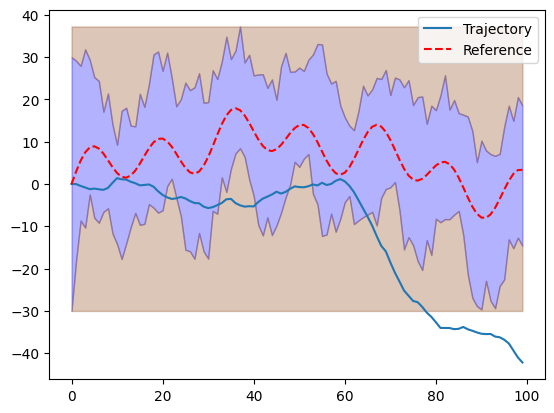

In [1]:
# Import relevant modules
from uuv_mission import *

sub = Submarine()
# Instantiate your controller (depending on your implementation)
controller = Controller()
closed_loop = ClosedLoop(sub, controller)
mission = Mission.from_csv("/workspaces/b1-coding-practical-mt24/data/mission.csv")

trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)